In [22]:
# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from sklearn.datasets import fetch_olivetti_faces
from torch.utils.data import DataLoader  # 数据加载器

In [23]:
# 定义超参数
LR = 1e-3
epochs = 20
BATCH_SIZE = 128

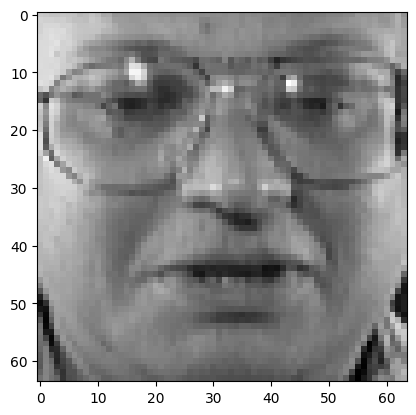

In [ ]:
ovfaces=fetch_olivetti_faces(data_home='./face_data',shuffle=True)

import matplotlib.pyplot as plt
face=ovfaces.images[1]
plt.imshow(face,cmap='gray')
plt.show()

In [34]:
images=torch.tensor(ovfaces.data)
print(images.shape)

torch.Size([400, 4096])


In [46]:
targets=torch.tensor(ovfaces.target)
print(targets.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.3)
dataset=[(img,lbl) for img,lbl in zip(X_train,y_train)]
print(dataset)
# dataset=[(X_train,y_train)]
# print(dataset)
dataLoader=torch.utils.data.DataLoader(dataset,BATCH_SIZE,shuffle=True)


from torch_face import Torch_face

model = Torch_face()
# print(model)

torch.Size([400])
[(tensor([0.5165, 0.5826, 0.6694,  ..., 0.1446, 0.1570, 0.2479]), tensor(31)), (tensor([0.1777, 0.2438, 0.2934,  ..., 0.3017, 0.3140, 0.2769]), tensor(6)), (tensor([0.1983, 0.2975, 0.4793,  ..., 0.1818, 0.2149, 0.2273]), tensor(36)), (tensor([0.3306, 0.3595, 0.2603,  ..., 0.3182, 0.3182, 0.3223]), tensor(28)), (tensor([0.4711, 0.5579, 0.6446,  ..., 0.2521, 0.2190, 0.1901]), tensor(31)), (tensor([0.5661, 0.5950, 0.6033,  ..., 0.3802, 0.3512, 0.3512]), tensor(14)), (tensor([0.5496, 0.5372, 0.4959,  ..., 0.2851, 0.2851, 0.2686]), tensor(17)), (tensor([0.1446, 0.2107, 0.2851,  ..., 0.2397, 0.2479, 0.2645]), tensor(23)), (tensor([0.3760, 0.4008, 0.4132,  ..., 0.6074, 0.7107, 0.6488]), tensor(34)), (tensor([0.4339, 0.5248, 0.6942,  ..., 0.1198, 0.1736, 0.1653]), tensor(26)), (tensor([0.3678, 0.4545, 0.5124,  ..., 0.1529, 0.1570, 0.1612]), tensor(23)), (tensor([0.3182, 0.4008, 0.4917,  ..., 0.1405, 0.1488, 0.1529]), tensor(0)), (tensor([0.3802, 0.3926, 0.4132,  ..., 0.1446, 

In [47]:
# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

In [48]:
model.train()  # 正则化&归一化生效
for epoch in range(epochs):
    # 提取训练数据
    for data, target in dataLoader:
        # 前向运算
        output = model(data.reshape(-1, 4096))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        model.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'Epoch:{epoch} Loss: {loss.item()}')

Epoch:0 Loss: 2.4755983352661133
Epoch:1 Loss: 1.1049963235855103
Epoch:2 Loss: 1.035621166229248
Epoch:3 Loss: 0.7171825766563416
Epoch:4 Loss: 0.47350597381591797
Epoch:5 Loss: 0.24788641929626465
Epoch:6 Loss: 0.20313584804534912
Epoch:7 Loss: 0.14212973415851593
Epoch:8 Loss: 0.10117214173078537
Epoch:9 Loss: 0.1155214011669159
Epoch:10 Loss: 0.08825229853391647
Epoch:11 Loss: 0.0262626800686121
Epoch:12 Loss: 0.06530313938856125
Epoch:13 Loss: 0.034560952335596085
Epoch:14 Loss: 0.03895847871899605
Epoch:15 Loss: 0.04278184846043587
Epoch:16 Loss: 0.029697611927986145
Epoch:17 Loss: 0.019055692479014397
Epoch:18 Loss: 0.008811636827886105
Epoch:19 Loss: 0.0355294793844223


In [50]:
testDataset=[(img,lbl) for img,lbl in zip(X_test,y_test)]
# 测试
test_dl = DataLoader(testDataset, batch_size=BATCH_SIZE)

correct = 0
total = 0
model.eval() # train(False)
with torch.no_grad():  # 不计算梯度
    for data, target in test_dl:
        output = model(data.reshape(-1, 4096))
        _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item()

print(f'Accuracy: {correct/total*100}%')

Accuracy: 92.5%
